## -------------------------------------------------------------------------------------------------------------------

<h1><center><font color='red'>EMAIL OPEN RATE PREDICTION !!</font></center></h1>

## --------------------------------------------------------------------------------------------------------------------

# <font color='peppsyblue'> Introduction :</font>


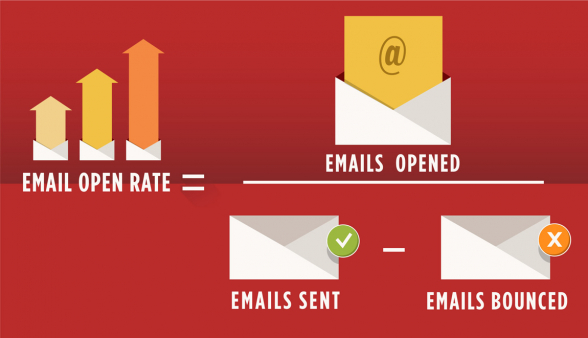



### A good email open rate should be between 17-28%, depending on the industry you're in. 
### While knowing these numbers is a great starting point, 
### it's worth it to look into your specific industry averages and compare your metrics with those in your specific industry.

 <h3><font color='red'>**********************************************</font></h3>

# <font color='Green'>Main Objectives :</font>

<h3><font color='red'>**********************************************</font></h3>

### ● _The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader._
### ● *In addition to the ML Model prediction, we also analyzed what all features can help us in getting the Email status to be not ignored by the customers.*
### ● *Optimizing the email subject line can deliver a very significant boost in email open rate, even after all the normal hygiene steps have already been done. Random forest works well for this.*

# <font color='brown'>importing necessary libraries</font>

In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns



# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/shishir349/Analyzing-the-Email-Opening-Rates/master/email.csv")

In [3]:
# lets check the shape of the data
df.shape

(6232, 4)

In [4]:
# checking the columns of the data
df.columns

Index(['email_subject', 'email_open_user_count', 'sent_user_count',
       'open_rate'],
      dtype='object')

In [5]:
# lets check teh head of the data
df.head(10)

,email_subject,email_open_user_count,sent_user_count,open_rate
0,Can you smell what The Rock is cooking?,71550,182821,39.14
1,Go Monochrome! Shop Black & white shirts,90103,240445,37.47
2,Dress up for work! Shop Office wear essentials,89214,246502,36.19
3,Hey Sharer! It's a brand new TV for you this t...,716,2011,35.60
4,Trend Alert: Tropical Floral Kurtas for Monsoon,97827,275391,35.52
5,Here's how to win big in October!,857,2414,35.50
6,Summer whites for hot days,176904,505422,35.00
7,"Hi{user_first_name}, Season's favourite Floral...",25546,73489,34.76
8,We have something for you {user_first_name},5753,16620,34.61
9,🎀 Shop Our Bestselling Styles,30450,88336,34.47


In [6]:
# checking the data tyoes of the data
df.dtypes

email_subject             object
email_open_user_count      int64
sent_user_count            int64
open_rate                float64
dtype: object

In [7]:
# checking the percentage of missing values

percentage_of_missing_values = df.isnull().sum()/df.shape[0]
print(percentage_of_missing_values)

email_subject            0.0
email_open_user_count    0.0
sent_user_count          0.0
open_rate                0.0
dtype: float64


# <font color='bronze'>Future Engineering...</font>


In [8]:
# creating a new feature containing the length of the subject
df['length'] = df['email_subject'].apply(len)

In [9]:
# lets check the head of the data after creating a new feature
df.head(20)

,email_subject,email_open_user_count,sent_user_count,open_rate,length
0,Can you smell what The Rock is cooking?,71550,182821,39.14,39
1,Go Monochrome! Shop Black & white shirts,90103,240445,37.47,40
2,Dress up for work! Shop Office wear essentials,89214,246502,36.19,46
3,Hey Sharer! It's a brand new TV for you this t...,716,2011,35.60,50
4,Trend Alert: Tropical Floral Kurtas for Monsoon,97827,275391,35.52,47
5,Here's how to win big in October!,857,2414,35.50,33
6,Summer whites for hot days,176904,505422,35.00,26
7,"Hi{user_first_name}, Season's favourite Floral...",25546,73489,34.76,61
8,We have something for you {user_first_name},5753,16620,34.61,43
9,🎀 Shop Our Bestselling Styles,30450,88336,34.47,29


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


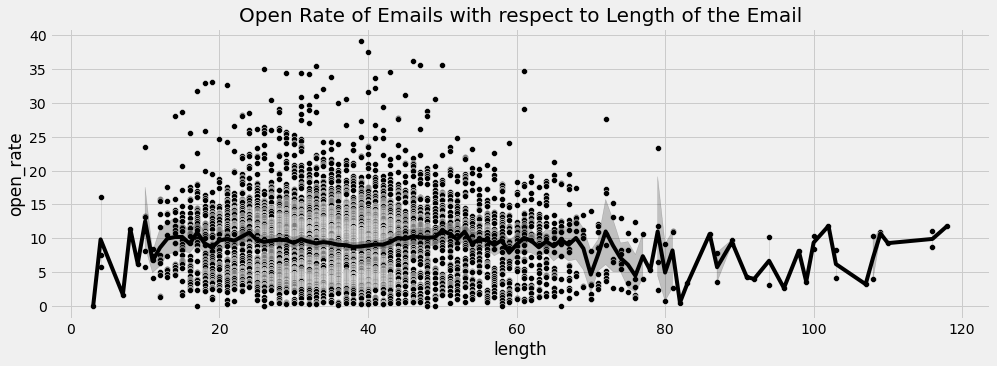

In [10]:
# lets check the effect of length of the suject with respect to the email subject

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.scatterplot(df['length'], df['open_rate'], color = 'black')
sns.lineplot(df['length'], df['open_rate'], color = 'black')
plt.title('Open Rate of Emails with respect to Length of the Email', fontsize = 20)
plt.show()

In [11]:
s = 'I am having a very nice day.'
len(s.split())

7

In [12]:
# lets create a feature containing the no. of words
df['no_of_words'] = df['email_subject'].apply(lambda x: len(x.split()))

# lets check the columns after creation of a new feature called the words count
df.head(10)

,email_subject,email_open_user_count,sent_user_count,open_rate,length,no_of_words
0,Can you smell what The Rock is cooking?,71550,182821,39.14,39,8
1,Go Monochrome! Shop Black & white shirts,90103,240445,37.47,40,7
2,Dress up for work! Shop Office wear essentials,89214,246502,36.19,46,8
3,Hey Sharer! It's a brand new TV for you this t...,716,2011,35.60,50,11
4,Trend Alert: Tropical Floral Kurtas for Monsoon,97827,275391,35.52,47,7
5,Here's how to win big in October!,857,2414,35.50,33,7
6,Summer whites for hot days,176904,505422,35.00,26,5
7,"Hi{user_first_name}, Season's favourite Floral...",25546,73489,34.76,61,7
8,We have something for you {user_first_name},5753,16620,34.61,43,6
9,🎀 Shop Our Bestselling Styles,30450,88336,34.47,29,5


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


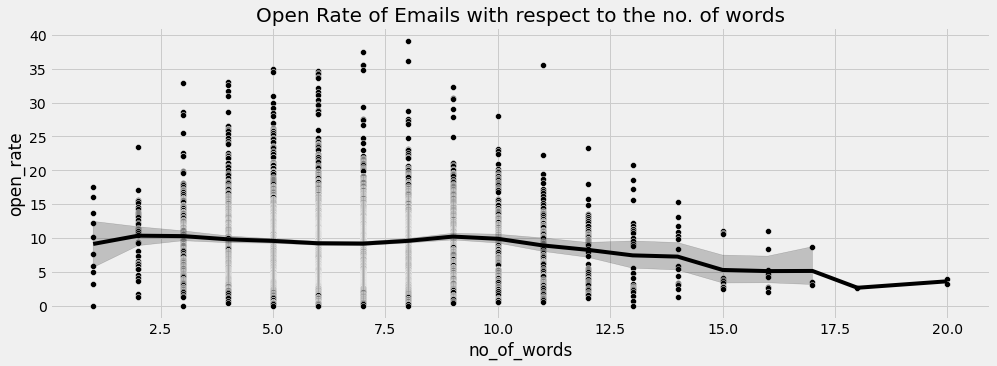

In [13]:
# lets check the effect of no of words of the suject with respect to the email subject

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.scatterplot(df['no_of_words'], df['open_rate'], color = 'black')
sns.lineplot(df['no_of_words'], df['open_rate'], color = 'black')
plt.title('Open Rate of Emails with respect to the no. of words', fontsize = 20)
plt.show()

In [14]:
# lets check the effect of opening rate of emails on the no. of words present in the subject of the email

@interact
def check(column = ['no_of_words','length']):
    x = df[[column,
      'open_rate']].groupby([column]).agg(['count',
                                                    'sum',
                                                    'max',
                                                    'min',
                                                    'mean']).style.background_gradient(cmap = 'Wistia')
    return x

interactive(children=(Dropdown(description='column', options=('no_of_words', 'length'), value='no_of_words'), …

# Data Analysis

In [15]:
#pip install dabl==0.2.2

In [16]:
import dabl

Target looks like regression


C:\ProgramData\Anaconda3\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 1 outliers in column open_rate.
  warn("Dropped {} outliers in column {}.".format(
C:\ProgramData\Anaconda3\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 13 outliers in column email_open_user_count.
  warn("Dropped {} outliers in column {}.".format(
C:\ProgramData\Anaconda3\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 2 outliers in column no_of_words.
  warn("Dropped {} outliers in column {}.".format(
C:\ProgramData\Anaconda3\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 23 outliers in column sent_user_count.
  warn("Dropped {} outliers in column {}.".format(
C:\ProgramData\Anaconda3\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 12 outliers in column length.
  warn("Dropped {} outliers in column {}.".format(


[array([[<AxesSubplot:title={'center':'F=7.57E+01'}, xlabel='email_open_user_c...', ylabel='open_rate'>,
         <AxesSubplot:title={'center':'F=9.19E+00'}, xlabel='no_of_words'>,
         <AxesSubplot:title={'center':'F=4.64E+00'}, xlabel='sent_user_count'>,
         <AxesSubplot:title={'center':'F=3.44E+00'}, xlabel='length'>]],
       dtype=object),
 None]

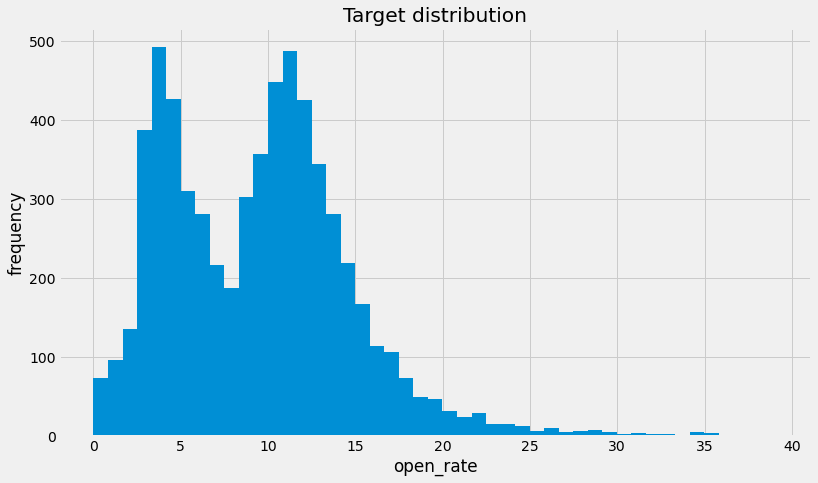

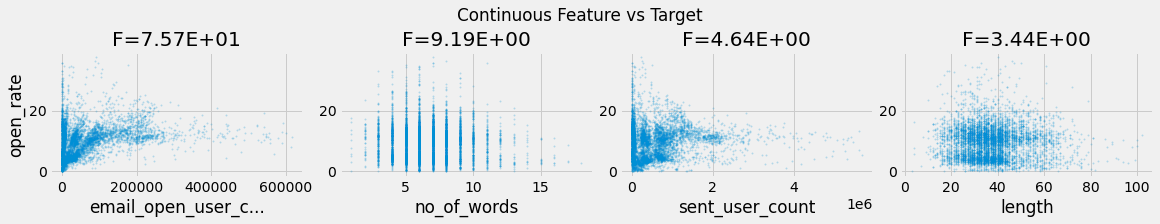

In [17]:
# lets compare the other features wrt to the target column
plt.rcParams['figure.figsize'] = (12,7)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col = 'open_rate')

# <font color='orange'>Descriptive Statistics..</font>

### Central Tendency

In [18]:
# lets check the mean , median and mode of the numerical columns

@interact
def check(column = df.select_dtypes('number').columns):
    print("Mean :", df[column].mean())
    print("Median :", df[column].median())
    print("Mode :", df[column].mode()[0])

interactive(children=(Dropdown(description='column', options=('email_open_user_count', 'sent_user_count', 'ope…

### Spread of the Features

In [19]:
# lets check the Range, Standard Deviation and Variance of the Numerical Features

@interact
def check(column = df.select_dtypes('number').columns):
    range = (df[column].max() - df[column].min())
    print("Range :", range)
    print("Variance :", df[column].var())
    print("Standard Deviation :", df[column].std())

interactive(children=(Dropdown(description='column', options=('email_open_user_count', 'sent_user_count', 'ope…

### Correlation and Causation

In [20]:
# lets check the correlation and covariance

@interact
def check(column1 = list(df.select_dtypes('number').columns),
          column2 = list(df.select_dtypes('number').columns)[1:]):
    print("Correlation :", df[column1].corr(df[column2]))
    print("Covariance :", df[column1].cov(df[column2]))

interactive(children=(Dropdown(description='column1', options=('email_open_user_count', 'sent_user_count', 'op…

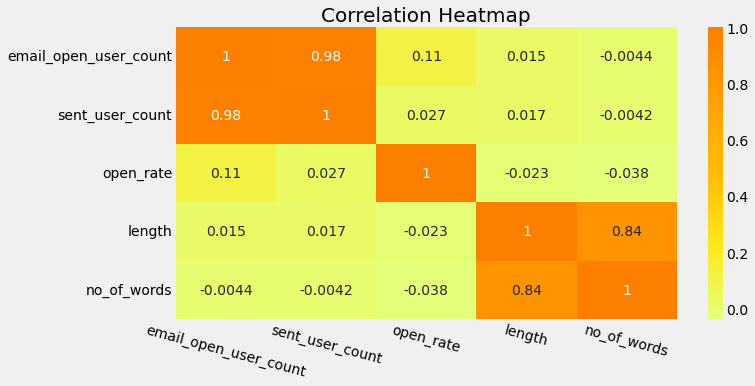

In [21]:
# lets check the correlation, covariance among the numerical features

# correlation
plt.rcParams['figure.figsize'] = (10,5)
plt.style.use('fivethirtyeight')

sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.xticks(rotation = 345)
plt.title('Correlation Heatmap', fontsize = 20)
plt.show()

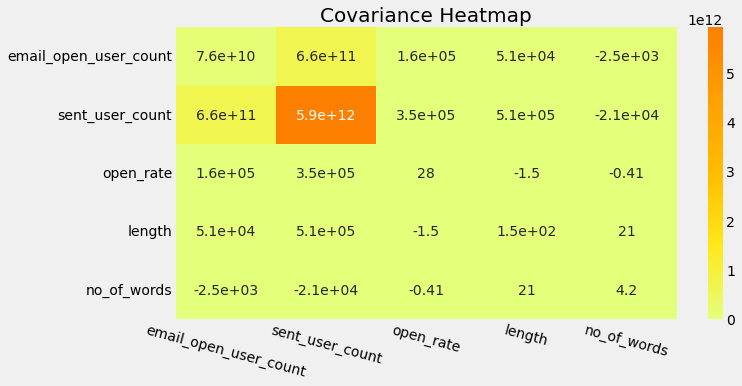

In [22]:
# covariance
plt.rcParams['figure.figsize'] = (10,5)
plt.style.use('fivethirtyeight')

sns.heatmap(df.cov(), annot = True, cmap = 'Wistia')
plt.xticks(rotation = 345)
plt.title('Covariance Heatmap', fontsize = 20)
plt.show()


# Inferential Statistics

### Probability Measure

In [23]:
# lets check the probability of an email subject being longer than 10 words and having opening rate more than 30%

df[(df['no_of_words'] >= 10) & (df['open_rate'] > 20)][['email_subject','open_rate',
                                                              'length']].style.background_gradient(cmap = 'PuBu')

,email_subject,open_rate,length
3,Hey Sharer! It's a brand new TV for you this time!,35.600000,50
43,You're one step away from winning a Brand New TV,28.000000,48
98,"{user_first_name}, Experience Extra 15% off on all orders! Only on updated app!",23.310000,79
100,Casual trousers for work & Play! Fill those carts NOW!,23.200000,54
108,"Play with lines , Get casual shirts | Free shipping",22.900000,51
116,Start Working Out ! Upto 60% off on sport shoes,22.370000,47
119,It's a win win: LR Gold Membership & so much more!,22.310000,50
159,Casual shirts in solid hues! Min 40% - 60% off,21.000000,46
167,"Buy 1 Get 2 FREE, price store or 80% Off + Free shipping",20.780000,56
189,"Make a SOLID statement, shop kurtas at upto 80% off",20.190000,51


In [24]:
# lets calculate the length of emails having that 30% opening rate and 10+ words in subject

x = df[(df['no_of_words'] >= 10) & (df['open_rate'] > 20)]
print("\nNumber of Email Subject with more than 30% Opening Rate with more than or equal to 10 words :", len(x))

# Total Number of Emails
y = df.shape[0]
print("\nTotal Number of Emails :", y)

# Probability of such mails having 30% opeining rate
probability = (len(x)/y)*100
print("\nThe Probability of Having Such Mails is {0:.2f}%".format(probability))


Number of Email Subject with more than 30% Opening Rate with more than or equal to 10 words : 10

Total Number of Emails : 6232

The Probability of Having Such Mails is 0.16%


### Target Distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


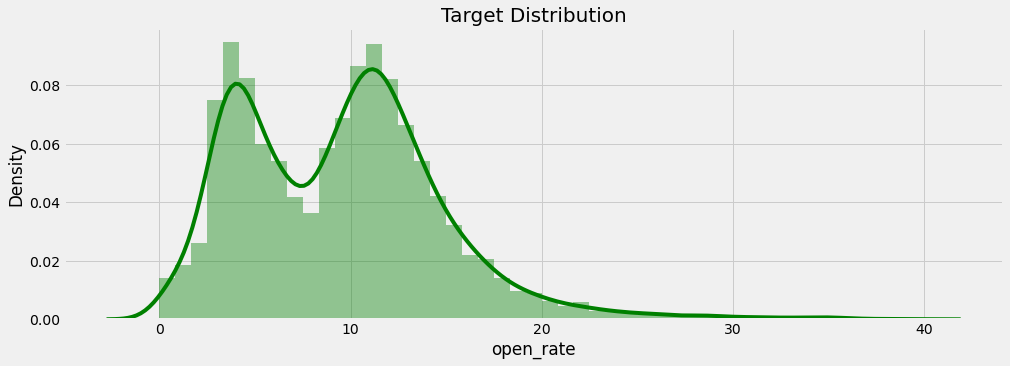

In [25]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.distplot(df['open_rate'], color = 'green')
plt.title('Target Distribution', fontsize = 20)
plt.show()

In [26]:
# lets check the shortest email subjects

df[(df['length'] < 10)][['email_subject',
                             'open_rate', 'length']].style.background_gradient(cmap = 'winter')

,email_subject,open_rate,length
549,....,16.110000,4
2176,No email,11.370000,8
3791,eqwe,7.610000,4
4167,Open Now!,6.250000,9
4313,#New,5.810000,4
6060,You Win,1.680000,7
6229,xyz,0.000000,3


In [27]:
# lets check the longest email subjects

df[(df['length'] > 100)][['email_subject',
                             'open_rate', 'length']].style.background_gradient(cmap = 'bone')

,email_subject,open_rate,length
1917,Hi{user_first_name}! You have {lr_credits_available} cashback credits waiting in your account! buy something you love!,11.840000,118
1923,Hi{user_first_name}! Save Rs {product_discount} on the {product_category} you just viewed! Only today!,11.830000,102
2357,Hi{user_first_name}! Your {lr_credits_available} cashback credits will expire within 24 hours! Shop now to use them.,11.090000,116
2449,You have a great choice {user_first_name}. {no_of_users_viewed} stylists have loved this product on Limeroad!,10.950000,109
2612,"{user_first_name}, Did you know? {no_of_users_viewed} people are viewing this item right now. Don't lose out!",10.650000,109
2668,Hi{user_first_name}! Did you know? this amazing {product_name} is available for only {product_selling_price}.,10.550000,109
2753,Hi{user_first_name}! Save Rs.{product_discount} on the {product_category} you just viewed! Only valid today!,10.370000,108
3259,Hi{user_first_name}! Did you know? This gorgeous {product_name} is available for only {product_selling_price}.,9.290000,110
3492,{other_user_name} & {no_of_users_viewed} other people added this product to their cart in the last 5 minutes. Hurry!,8.730000,116
3625,"{user_first_name}, 200 LR credits added to your account for today! Best time to complete your purchase!",8.310000,103


In [28]:
df[['email_subject',
      'open_rate','length']].sort_values(['open_rate']).head(20).style.background_gradient(cmap = 'summer')

,email_subject,open_rate,length
6231,"Hi{user_first_name}, Shop Trending Layered Kurtas",0.000000,49
6225,6 of your looks got loved!,0.000000,26
6226,western high noon,0.000000,17
6230,"{user_first_name}, Work ready kurtas at flat 399",0.000000,48
6228,"Hi{user_first_name}, On-trend styles by Cobb! Flat 55% off",0.000000,58
6227,3 of your looks got loved!,0.000000,26
6229,xyz,0.000000,3
6224,People loved your first look and are waiting to see more from you!,0.040000,66
6223,The chance to preview new collection,0.160000,36
6222,Shop At Min. 40% Off!,0.240000,21


In [29]:
# lets check the email subjects having highest opening percentages

df[['email_subject','open_rate','length']].sort_values(['open_rate'],
                                                ascending = False).head(15).style.background_gradient(cmap = 'pink')

,email_subject,open_rate,length
0,Can you smell what The Rock is cooking?,39.140000,39
1,Go Monochrome! Shop Black & white shirts,37.470000,40
2,Dress up for work! Shop Office wear essentials,36.190000,46
3,Hey Sharer! It's a brand new TV for you this time!,35.600000,50
4,Trend Alert: Tropical Floral Kurtas for Monsoon,35.520000,47
5,Here's how to win big in October!,35.500000,33
6,Summer whites for hot days,35.000000,26
7,"Hi{user_first_name}, Season's favourite Floral kurtas for you",34.760000,61
8,We have something for you {user_first_name},34.610000,43
9,🎀 Shop Our Bestselling Styles,34.470000,29


# Data Visualization

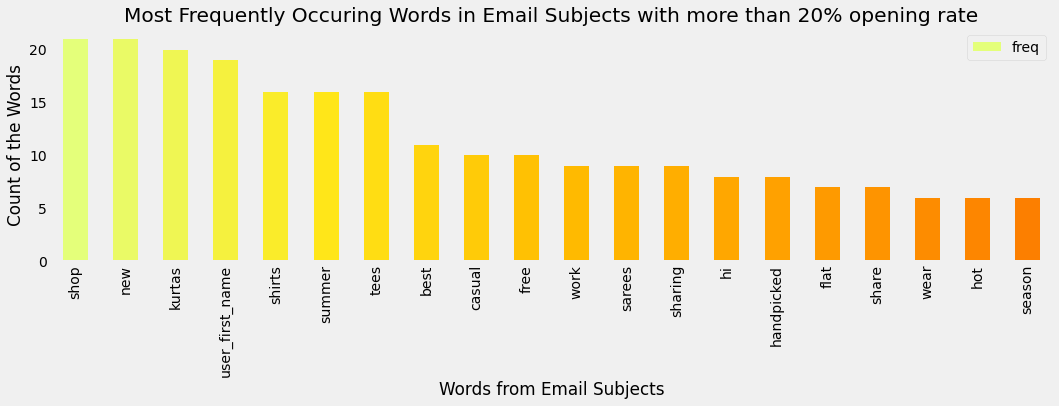

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

x = df[df['open_rate'] > 20]
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(x.email_subject)
sum_words = words.sum(axis=0)


words_freq_x = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq_x = sorted(words_freq_x, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq_x, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.Wistia(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(16, 4), color = color)
plt.title("Most Frequently Occuring Words in Email Subjects with more than 20% opening rate")
plt.ylabel('Count of the Words')
plt.xlabel('Words from Email Subjects')
plt.grid()
plt.show()

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
x = df[df['open_rate'] < 10]
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(x.email_subject)
sum_words = words.sum(axis=0)

In [33]:
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

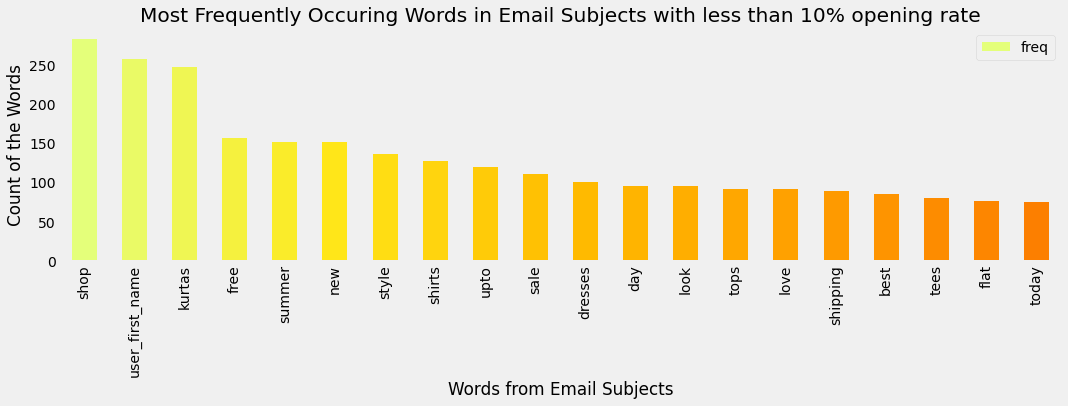

In [34]:
plt.style.use('fivethirtyeight')
color = plt.cm.Wistia(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(16, 4), color = color)
plt.title("Most Frequently Occuring Words in Email Subjects with less than 10% opening rate")
plt.ylabel('Count of the Words')
plt.xlabel('Words from Email Subjects')
plt.grid()
plt.show()

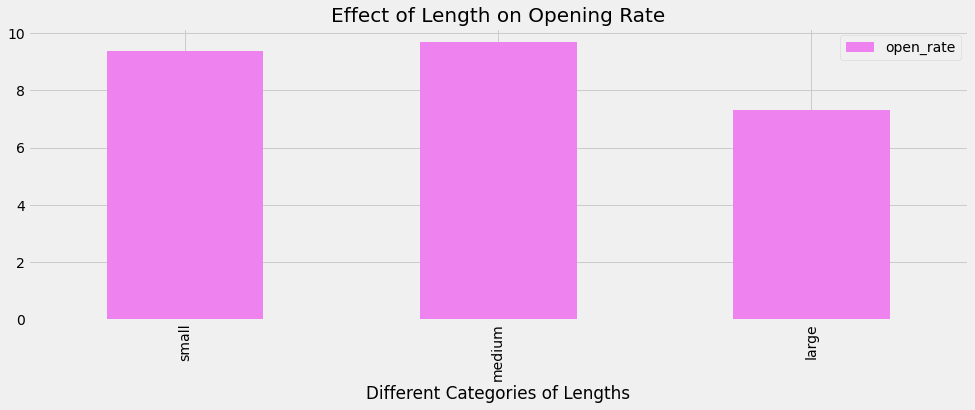

In [35]:
# lets divide the length in four categories 
df['length_category'] = pd.cut(df['length'], bins = 3, labels = ['small','medium','large'])

# now lets check the average email opening rate with all the new categories formed
df[['length_category',
      'open_rate']].groupby(['length_category']).agg('mean').plot(kind = 'bar', color = ['violet'])
plt.xlabel('Different Categories of Lengths')
plt.title('Effect of Length on Opening Rate', fontsize = 20)
plt.show()

In [36]:
df.columns

Index(['email_subject', 'email_open_user_count', 'sent_user_count',
       'open_rate', 'length', 'no_of_words', 'length_category'],
      dtype='object')

In [37]:
# lets check all the possible scatter plots

@interact_manual
def check(column = list(df.select_dtypes('number').columns),
          column2 = list(df.select_dtypes('number').columns[1:])):
    sns.scatterplot(df[column], df[column2])

interactive(children=(Dropdown(description='column', options=('email_open_user_count', 'sent_user_count', 'ope…

In [38]:
#pip install wordcloud

In [39]:
from wordcloud import WordCloud

In [40]:
wordcloud = WordCloud(background_color = 'lightcyan', 
                      width = 2000,
                      height = 2000).generate_from_frequencies(dict(words_freq_x))

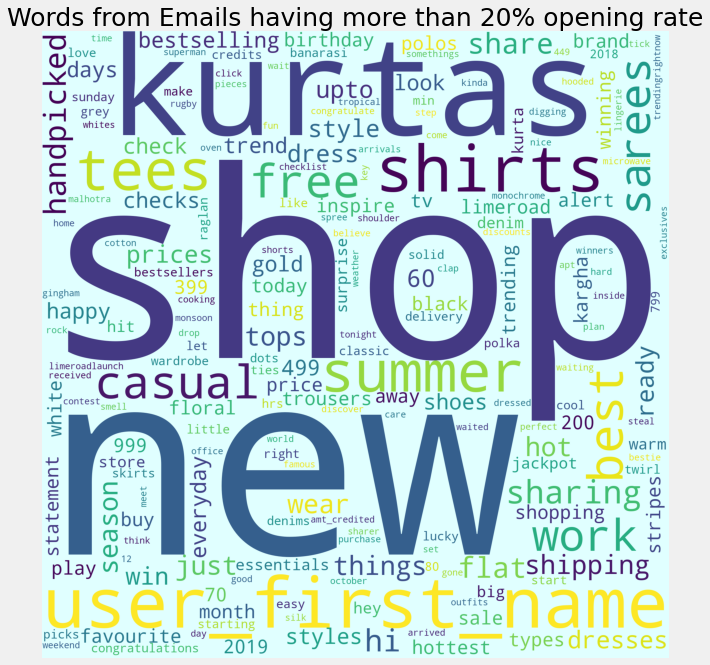

In [41]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Words from Emails having more than 20% opening rate", fontsize = 25)
plt.show()

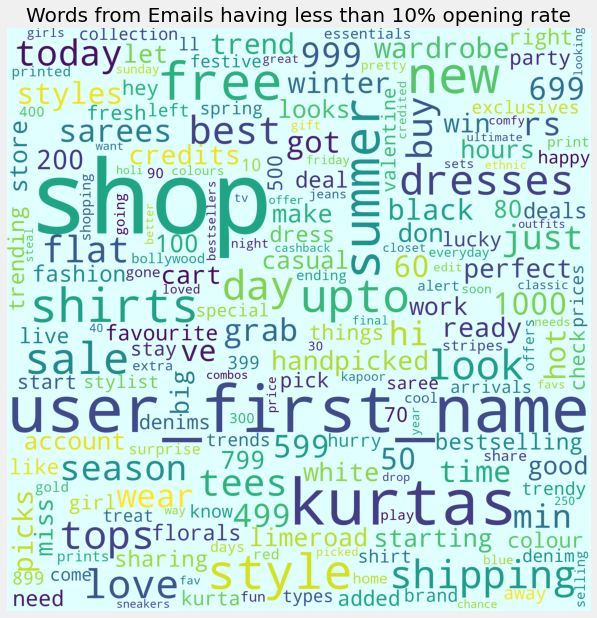

In [42]:
wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 2000,
                      height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Words from Emails having less than 10% opening rate", fontsize = 20)
plt.show()

In [43]:
# cleaning the texts
# importing the libraries for Natural Language Processing

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ELCOT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
df.shape

(6232, 7)

In [45]:
corpus = []

for i in range(0, 6232):
    review = re.sub('[^a-zA-Z]', ' ', df['email_subject'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [46]:
#pip install spacy

In [47]:
import spacy 
  
nlp = spacy.load('en_core_web_sm') 
x = " ".join(corpus)
doc = nlp(x) 

for ent in doc.ents: 
    print(ent.text," ", ent.label_) 

first   ORDINAL
favourit   ORG
kurta   GPE
first   ORDINAL
summer   DATE
happi birthday superman steal   PERSON
today   DATE
one   CARDINAL
first   ORDINAL
kurta   GPE
tonight   TIME
kurta   GPE
summer   DATE
one   CARDINAL
sunday   DATE
first   ORDINAL
last month   DATE
first   ORDINAL
summer   DATE
kurta   GPE
weekend   DATE
summer   DATE
first   ORDINAL
winter season   DATE
kurta head   PERSON
kurta   GPE
kurta   GPE
one   CARDINAL
first   ORDINAL
kurta   GPE
kurta free deliveri   PERSON
first   ORDINAL
tuesday   DATE
first   ORDINAL
today   DATE
first   ORDINAL
banarasi sare start work upto sport shoe   ORG
kurta   GPE
summer   DATE
season   DATE
meghanmarklexprinceharri day   DATE
first   ORDINAL
summer   DATE
first   ORDINAL
anarkali kurta   PERSON
cami   GPE
first   ORDINAL
first   ORDINAL
monday   DATE
fit day   DATE
kurta   GPE
summer   DATE
first   ORDINAL
summer   DATE
kurta   GPE
shop micro   ORG
ali khan   PERSON
kurta   GPE
kurta mandarin   PERSON
kurta   GPE
first   ORDI

In [48]:
# lets count the total number of entities present in the email subjects

article = nlp(x)
len(article.ents)

2341

In [49]:
from collections import Counter
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'ORDINAL': 547,
         'ORG': 178,
         'GPE': 455,
         'DATE': 636,
         'PERSON': 330,
         'CARDINAL': 50,
         'TIME': 63,
         'FAC': 7,
         'NORP': 70,
         'EVENT': 1,
         'LANGUAGE': 1,
         'QUANTITY': 1,
         'LOC': 1,
         'LAW': 1})

In [50]:
items = [x.text for x in article.ents]
Counter(items).most_common(5)

[('first', 546),
 ('kurta', 397),
 ('summer', 201),
 ('today', 102),
 ('winter', 45)]

In [51]:
# total number of words
len(x)

148128

In [52]:
# creating a TF-IDF vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(max_features = 2000)

x = cv.fit_transform(corpus).toarray()
y = df['open_rate']

print(x.shape)
print(y.shape)

(6232, 2000)
(6232,)


In [53]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
# splitting into training and testing datasets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# lets print the shape of newly forned sets
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (4985, 2000)
Shape of x_test : (1247, 2000)
Shape of y_train : (4985,)
Shape of y_test : (1247,)


In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

print(pca.explained_variance_)

[0.02134069 0.01412289 0.01341622 0.01176952 0.01083274 0.00983312
 0.00918617 0.00882083 0.00851782 0.008398  ]


## <font color='purple'>Regression Model fitting techniques..</font>

### (1) Linear Regression

In [56]:
#Linear Regression is a linear approach for modelling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

In [57]:
import matplotlib.pyplot as plt
from scipy.stats import itemfreq
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
#from sklearn.model_selection import train_test_split
%matplotlib inline
import datetime
from datetime import date, timedelta
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier


In [58]:
# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(x_train, y_train)
print(results)
y_pred = results.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("The RMSE IS :",rmse)
r2 = r2_score(y_test, y_pred)
print("\nSCORE",r2)

LinearRegression()
The RMSE IS : 5.232985036863419

SCORE 0.024617242289907137


In [59]:
# Print the coefficients
print (results.intercept_, results.coef_)

9.43439518555667 [ 0.72217405  3.39216415  4.0134533   3.57713446  1.17567187  0.76851938
  2.64016756 -1.77717886  0.18019177  2.5712897 ]


In [60]:
import statsmodels.api as sm

model = sm.OLS(y_train, x_train)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()
# Here the Ordinalry Least Squares method has given us the r^2 value of 0.354 which is poor for model to be predicted on these variables.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              open_rate   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              3.035
Date:                Fri, 29 Jul 2022   Prob (F-statistic):                    0.000771
Time:                        14:24:18   Log-Likelihood:                         -18926.
No. Observations:                4985   AIC:                                  3.787e+04
Df Residuals:                    4975   BIC:                                  3.794e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7222      1.046      0.690      0.490      -1.329       2.773
x2             3.3922      1.286      2.638      0.008       0.871       5.913
x3             4.0135      1.319      3.042      0.002       1.427       6.600
x4             3.5771      1.409      2.539      0.011       0.815       6.339
x5             1.1757      1.468      0.801      0.423      -1.703       4.054
x6             0.7685      1.541      0.499      0.618      -2.253       3.790
x7             2.6402      1.595      1.656      0.098      -0.486       5.766
x8            -1.7772      1.627     -1.092      0.275      -4.967       1.413
x9             0.1802      1.656      0.109      0.913      -3.066       3.427
x10            2.5713      1.668      1.542      0.123      -0.698       5.841
==============================================================================
Omnibus:                      666.937   Durbin-Watson:                   0.466
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1234.594
Skew:                           0.860   Prob(JB):                    8.15e-269
Kurtosis:                       4.728   Cond. No.                         1.59
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Cross Validation using Scikit Learn
R^2 value is basically dependant on the way the data is split. Hence, there may be times when the R^2 value may not be able to represent the model's ability to generalize. For this we perform cross validation.

In [61]:
reg=linear_model.LinearRegression()
cv_results=cross_val_score(reg,x_train,y_train,cv=5)
print(cv_results)
print(np.mean(cv_results))
print(np.std(cv_results))
#Using cross validation of score 5

[0.01508112 0.04009358 0.02563448 0.00478302 0.0171201 ]
0.020542456868069835
0.01181586745334027


## Regularization
We perform regularization in order to alter the loss function to penalize it for having higher coefficients for each feature variable. And as we know, large coefficients leads to overfitting.

In [62]:
ridge = Ridge(alpha=0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_pred=ridge.predict(x_test)
ridge.score(x_test,y_test)
#The score is pretty much similar to the linear model built which ensures that the model has passed the Ridge regression test
# for regularization
#Ridge is used to penalize the loss function by adding the OLS loss function to the square of each coefficient multiplied by alpha.

0.02418576797790506

## (2)DecisionTree Regressor
A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

In [63]:
dtr=DecisionTreeRegressor(max_depth=10,min_samples_leaf=5,max_leaf_nodes=5)

In [64]:
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE = ",rmse)
r2 = r2_score(y_test, y_pred)
print(r2)

RMSE =  5.247281994337317
0.019280305464475567


## (3)ExtraTreesRegressor
Extra-trees differ from classic decision trees in the way they are built. When looking for the best split to separate the samples of a node into two groups, random splits are drawn for each of the max_features randomly selected features and the best split among those is chosen.

In [65]:
etr = ExtraTreesRegressor()

# Choose some parameter combinations to try

parameters = {'n_estimators': [10],
              'criterion': ['mse'],
              'max_depth': [5], 
              'min_samples_split': [2],
              'min_samples_leaf': [1]
             }
#We have to use RandomForestRegressor's own scorer (which is R^2 score)

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold

grid_obj = GridSearchCV(etr, parameters,
                        cv=3, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
etr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
etr.fit(x_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


ExtraTreesRegressor(max_depth=5, n_estimators=10)

In [66]:
y_pred = etr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE = ",rmse)
r2 = r2_score(y_test, y_pred)
print(r2)


RMSE =  5.200434709991785
0.0367136975141894


## (4) RandomForestRegression

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE = ",rmse)
r2 = r2_score(y_test, y_pred)
print(r2)

RMSE =  5.144686521293061
0.057255683757130416


## (5) Gradient Boosting Regressor

In [68]:
modelgbr = GradientBoostingRegressor(n_estimators=100,max_depth=2, random_state=42)
modelgbr.fit(x_train,y_train)
y_pred = modelgbr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE = ",rmse)
r2 = r2_score(y_test, y_pred)
print(r2)

RMSE =  5.179729454550607
0.04436897439321874


## (6) Ada Boosting Regressor

In [69]:
regr = AdaBoostRegressor(random_state=42, n_estimators=100)
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE = ",rmse)
r2 = r2_score(y_test, y_pred)
print(r2)


RMSE =  5.823884019688811
-0.20809621433216585


<BarContainer object of 6 artists>

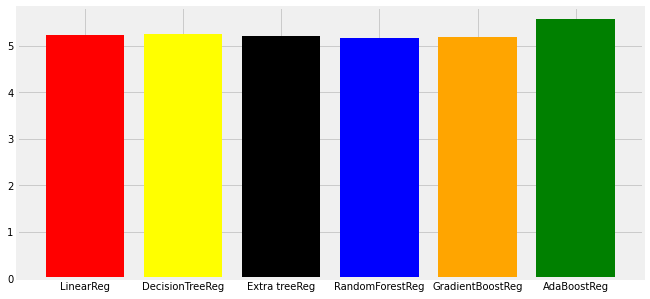

In [70]:
reg = ['LinearReg','DecisionTreeReg','Extra treeReg','RandomForestReg','GradientBoostReg','AdaBoostReg']
rmse = [5.2342,5.2577,5.2155,5.1593,5.1836,5.5618]
c = ['red', 'yellow', 'black', 'blue', 'orange','green']
plt.figure(figsize=(10, 5))
plt.bar(reg,rmse,color=c)


In [71]:
print(reg[rmse.index(min(rmse))],'is Best Fit..!')

RandomForestReg is Best Fit..!


# <font color='green'>**** CONCLUSION ****</font>

### <font color='red'>(i)  </font> Use 6 to 10 words in your subject lines to get the best open rate.
### <font color='red'>(ii) </font>Personalize subject lines with the reader's name.
### <font color='red'>(iii)</font>Use a recognizable sender name.
### <font color='red'>(iv) </font>Optimize your email campaigns for mobile .
# <font color='green'>** -------------------- **</font>

<h2><font color='red'>Web References :</font>

* https://github.com/Harsh1091996/Email_Campaign_Effectiveness_Prediction/blob/main/Email%20Campaign%20Effectiveness%20Prediction%20(1).pdf

* https://github.com/shishir349/Analyzing-the-Email-Opening-Rates

* https://marketing.engineering.com/digital-marketing-for-engineers-blog/using-machine-learning-to-improve-email-marketing-success-a-how-to-guide

* https://www.researchgate.net/publication/305330510_Open-Rate_Controlled_Experiment_in_E-Mail_Marketing_Campaigns

## <center> <font color='red'>FIND OPEN RATE USING PYTHON..,</font>
    

In [72]:
subject=input("Enter the Subject of an Email:").strip()
subject=subject.replace(" ", "")

length=len(subject)

# formula:
# Open rate = (total unique opens ÷ total recipients) x 100


total_unique_opens=int(input("\nEnter the count of Email Reads:"))
total_recipients=int(input("\nEnter the total recipients:"))
# email Bouncing is rare..hence ignored.
flag = total_unique_opens / total_recipients
open_rate=flag*100
print("\n---Email Open Rate is--->",int(open_rate),"%")

print("\nThe Total Length of an Subject Line is:",length)

if(length<20 and open_rate>30):
    print("*** Email Clicks becomes High ***")
elif(length>20 or length<50 or open_rate>30):
    print("*** Email Clicks becomes Moderate ***")
else:
    print("*** Email Clicks rate becomes Low  ***")

Enter the Subject of an Email:offer closes soon..! Hurry up mr.mayank✨🎉

Enter the count of Email Reads:1200

Enter the total recipients:7000

---Email Open Rate is---> 17 %

The Total Length of an Subject Line is: 36
*** Email Clicks becomes Moderate ***



# <center><font color='blue'> Thank You...!  </font>